# Customer Conversion

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import graphviz
from IPython.core.display import display, HTML

In [3]:
plt.style.use('ggplot')

## Loading Data

In [4]:
df = pd.read_csv('../data/bank-full.csv', sep=";")

In [5]:
df.shape

(45211, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

### EDA

In [8]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)

In [9]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [10]:
conversion_rate_by_marital = df.groupby('marital')['conversion'].sum() / df.groupby('marital')['conversion'].count() * 100.0

In [11]:
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

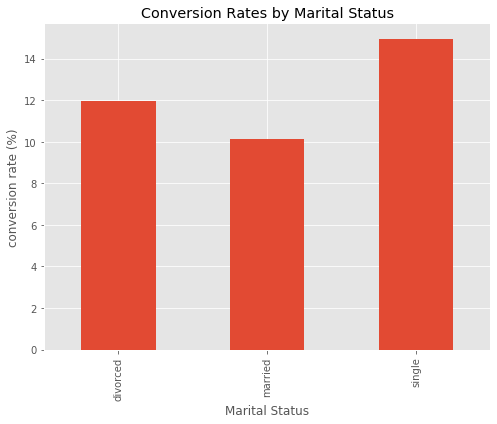

In [14]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    figsize=(8, 6),
    title='Conversion Rates by Marital Status'
)
ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [15]:
conversion_rate_by_job = df.groupby('job')['conversion'].sum() / df.groupby('job')['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

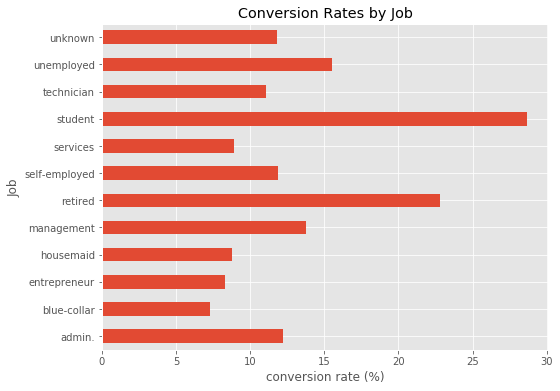

In [16]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    figsize=(8, 6),
    title='Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

In [17]:
conversions_by_contacts = df.groupby('campaign')['conversion'].sum() / df.groupby('campaign')['conversion'].count() * 100.0

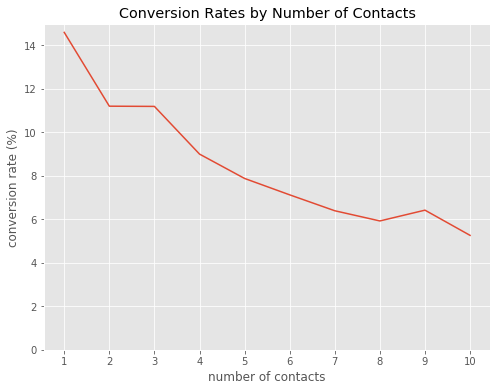

In [18]:
ax = conversions_by_contacts[:10].plot(
    figsize=(8, 6),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [19]:
conversions_by_age = df.groupby('age')['conversion'].sum() / df.groupby('age')['conversion'].count() * 100.0

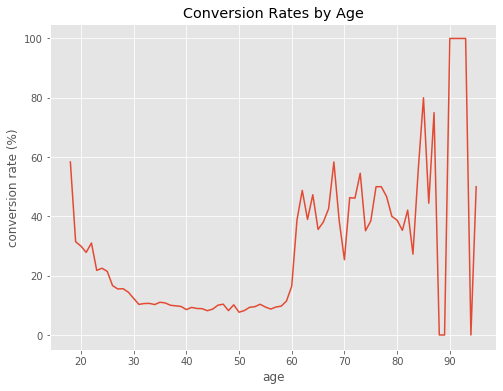

In [20]:
ax = conversions_by_age.plot(
    figsize=(8, 6),
    title='Conversion Rates by Age'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [21]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [22]:
conversions_by_age_group = df.groupby('age_group')['conversion'].sum() / df.groupby('age_group')['conversion'].count() * 100.0

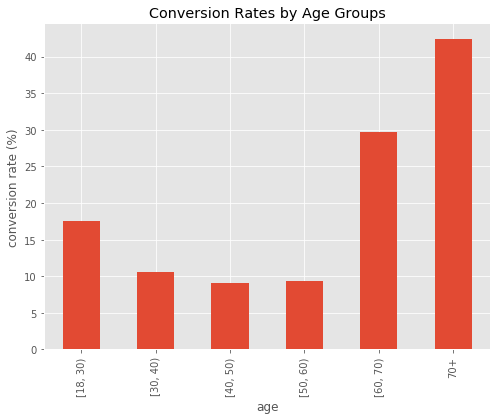

In [23]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    figsize=(8, 6),
    title='Conversion Rates by Age Groups'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [24]:
default_by_conversion_df = pd.pivot_table(
    df, 
    values='y', 
    index='default', 
    columns='conversion', 
    aggfunc=len
)

In [25]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


In [26]:
default_by_conversion_df.columns = ['non_conversions', 'conversions']

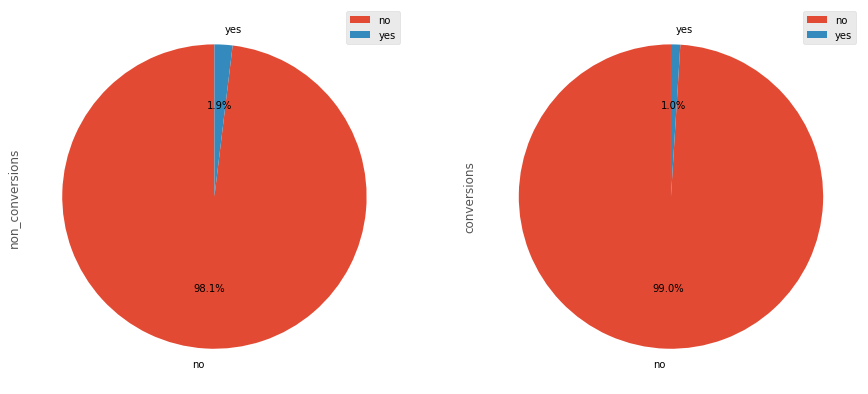

In [27]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

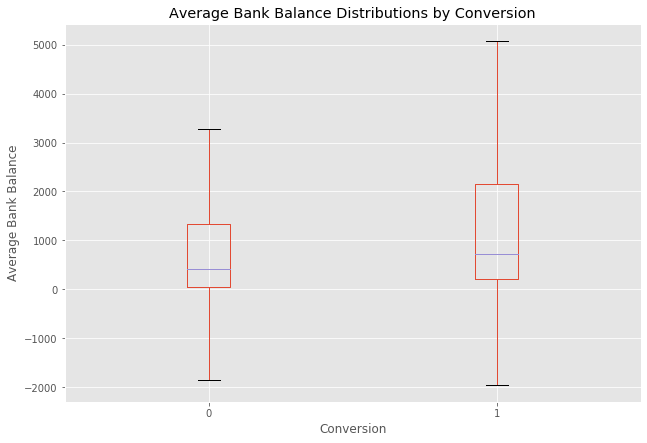

In [28]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

In [29]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [30]:
age_marital_df = age_marital_df.divide(df.groupby('age_group')['conversion'].count(), axis=0)

In [31]:
age_marital_df

marital,divorced,married,single
age_group,,,
70+,0.099278,0.319495,0.005415
"[18, 30)",0.002086,0.023326,0.150578
"[30, 40)",0.008735,0.050473,0.046548
"[40, 50)",0.015015,0.058172,0.018018
"[50, 60)",0.019025,0.068014,0.006302
"[60, 70)",0.051220,0.237398,0.008130


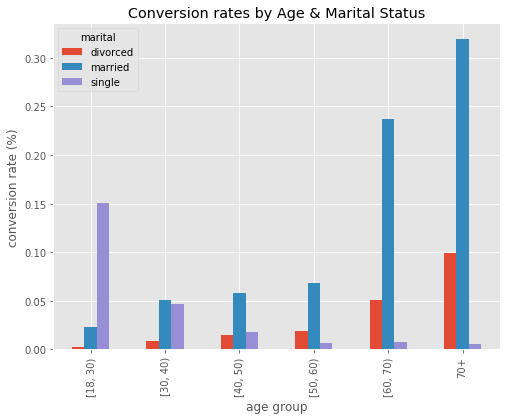

In [32]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    figsize=(8, 6)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

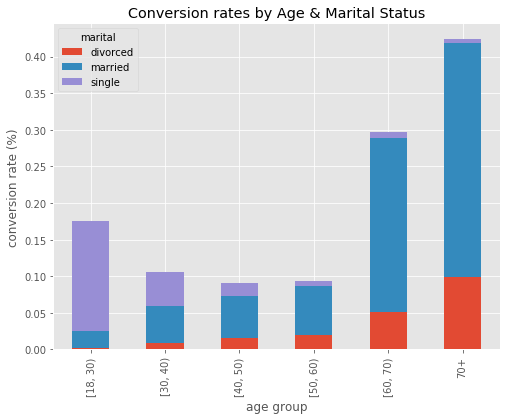

In [33]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    figsize=(8, 6)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

## Encoding Categorical Variables

In [34]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month'
]

In [35]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

In [36]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df['month'].apply(lambda x: months.index(x) + 1)

In [37]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [38]:
df.groupby('month').mean()['conversion']

month
1     0.101212
2     0.166478
3     0.519916
4     0.196794
5     0.067195
6     0.102228
7     0.090935
8     0.110133
9     0.464594
10    0.437669
11    0.101511
12    0.467290
Name: conversion, dtype: float64

In [39]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [40]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [41]:
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
df = pd.concat([df, jobs_encoded_df], axis=1)

In [43]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
df = pd.concat([df, marital_encoded_df], axis=1)

In [44]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [45]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

## Fitting Decision Trees

In [46]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)
response_var = 'conversion'

In [47]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [48]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Interpreting Decision Tree Model

In [49]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 

In [50]:
graph = graphviz.Source(dot_data)

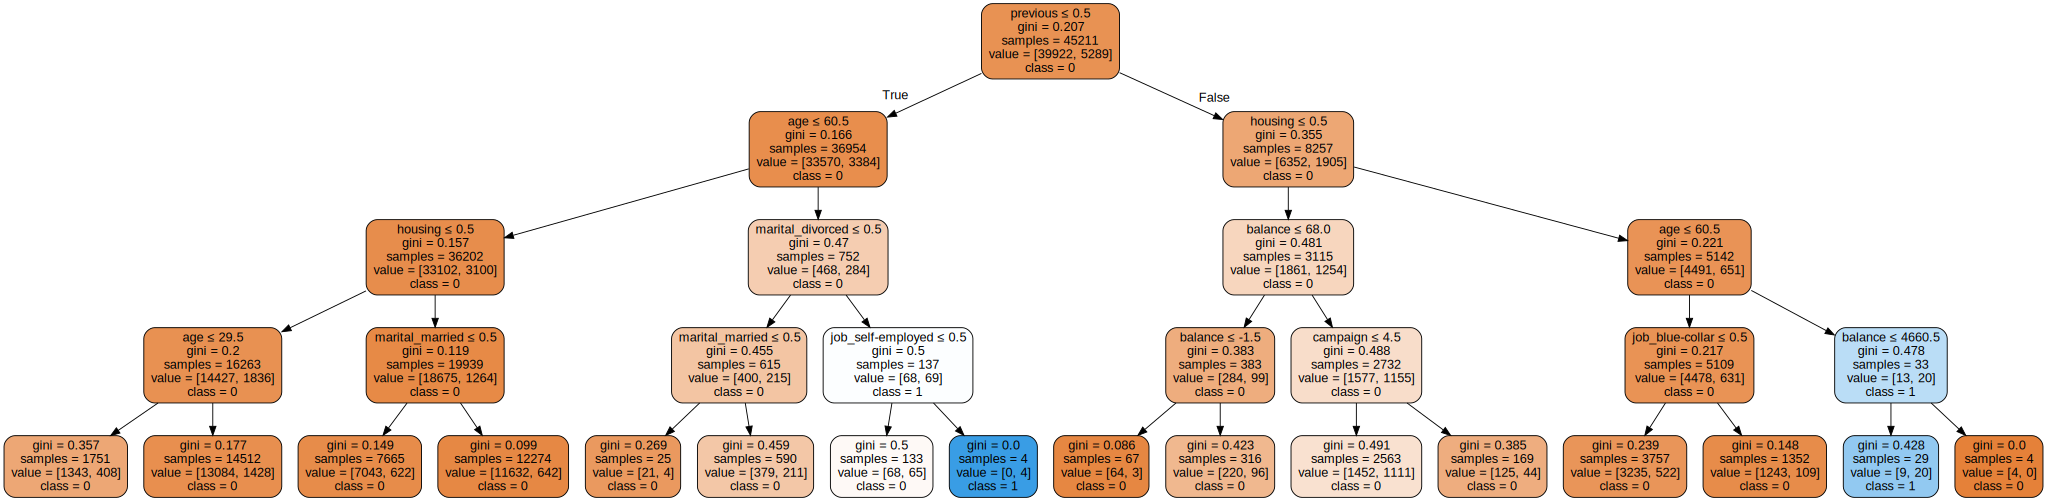

In [51]:
display(HTML("<style>text {font-size: 10px;}</style>"))
graph